In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [17]:
#Opening the test and train data to save into variables
train_path = '/kaggle/input/mnist-in-csv/mnist_train.csv'
test_path = '/kaggle/input/mnist-in-csv/mnist_test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [18]:
import random
import matplotlib.pyplot as plt

#Here I am defining a function that will let us visualize the data and the accompanying label
def rand_example(data):
    #Selecting a random data point from our data
    rand_num = random.randrange(0,data.shape[0])
    rand_data = data.iloc[rand_num]
    
    #splitting the labels and pixel values
    label = rand_data[0]
    pixels = np.array(rand_data[1:])
    print(pixels.shape)
    
    #reshaping pixel values to be in the correct shape
    pixels = pixels.reshape((28,28))
    print(pixels)
    
    plt.title(f'Label is {label}')
    plt.imshow(pixels, cmap='gray')
    plt.show()
    

(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  47  69 150 210 255 254 254
   45   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  48  94 142 211 253 253 253 200 160 210 253
  129   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  52 140 174 249 253 251 217 215 114  31

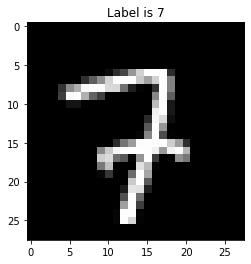

In [19]:
rand_example(test_data)

In [20]:
train_data.shape

(60000, 785)

In [21]:
def data_transform(data):
    length = data.shape[0]
    labels = data['label']
    pixels = data.drop('label', axis=1)

    labels = np.array(labels)
    pixels = np.array(pixels)


    pixels = pixels.reshape((length,28,28))
    return pixels,labels

X_train, y_train = data_transform(train_data)
X_test, y_test = data_transform(test_data)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [22]:
import torch

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_train = X_train.type(torch.FloatTensor)
y_train = y_train.type(torch.LongTensor)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

X_test = X_test.type(torch.FloatTensor)
y_test = y_test.type(torch.LongTensor)


In [23]:
print(X_test.dtype)

torch.float32


In [24]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_set = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_set = DataLoader(test_dataset, batch_size=64,shuffle = True)

for data in train_set:
    print(data)
    break

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,

In [25]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [26]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=10, bias=True)
    (9): ReLU()
  )
)


In [27]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [28]:
learning_rate = 1e-4
#batch_size = 64
epochs = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
for t in range(epochs):
    print(f"Epoch {t+1} - Learning Rate: {learning_rate}\n-------------------------------")
    train_loop(train_set, model, loss_fn, optimizer)
    test_loop(test_set, model, loss_fn)
print("Done!")

Epoch 1 - Learning Rate: 0.0001
-------------------------------
loss: 2.732297  [    0/60000]
loss: 2.125039  [ 6400/60000]
loss: 1.984109  [12800/60000]
loss: 1.894516  [19200/60000]
loss: 1.880681  [25600/60000]
loss: 1.870952  [32000/60000]
loss: 1.595463  [38400/60000]
loss: 1.666177  [44800/60000]
loss: 1.616250  [51200/60000]
loss: 1.763234  [57600/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 0.023842 

Epoch 2 - Learning Rate: 0.0001
-------------------------------
loss: 1.328708  [    0/60000]
loss: 1.413822  [ 6400/60000]
loss: 1.333464  [12800/60000]
loss: 1.558302  [19200/60000]
loss: 1.370843  [25600/60000]
loss: 1.329203  [32000/60000]
loss: 1.196300  [38400/60000]
loss: 1.126177  [44800/60000]
loss: 1.176456  [51200/60000]
loss: 1.089009  [57600/60000]
Test Error: 
 Accuracy: 62.3%, Avg loss: 0.019580 

Epoch 3 - Learning Rate: 0.0001
-------------------------------
loss: 1.508613  [    0/60000]
loss: 1.318599  [ 6400/60000]
loss: 1.252593  [12800/60000]
loss: 1.004428